## **About this Script**

The purpose of this script is to aid our understanding of color channels, RGB values, and pixels. 

We will read medical images into this notebook and determine their specs. 

Questions? Contact: maese005@umn.edu

## **Step 1:** Get Data

The data can be found here: https://github.com/maese005/GLBIO-2021 (GitHub) and here: https://drive.google.com/drive/folders/1PfmN-z4dTWKXenSJsD2hlO2JF48ZjaN1?usp=sharing (Google Drive)

It consists of two images: covid chest X-ray image and breast cancer microscopy image. 

Drag both images into your Google Drive, then mount your Google Drive to your Google Colab notebook. 

**If you obtain images from Google Drive** Click on the link provided. Then, select images and Add shortcut to drive. Adding a shortcut allows for quick data transfer to your Google Drive. 

## **Step 2:** Mount Google Drive to Google Colab

First, mount your Google Drive to your Google Colab.

This will allow you to share files and access images stored in Google Drive from Google Colab.

Once you run this code, you will receive a prompt asking you to click a link. When you click on this link, it will allow for 'Google Files Stream' to access your drive.

After, you will receive a long authentication code which you need to copy and enter into your Colab's notebook.

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Step 3:** Load Libraries

Load libraries. 

In [17]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from PIL import Image
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2lab, rgb2gray, lab2rgb
import matplotlib.pyplot as plt


## **Step 4:** Import Images

Read an image into the object 'image'.

Here, I am reading a chest X-ray image representing covid. 

Note: I recommend using a .png image as .jpeg didn't work for me. 

The function **imread()** helps load an image and its pixel values. 

In [18]:
image = cv2.imread('/content/drive/My Drive/AI_Workshop/Color Code Images/covid.png') 

Lets take a look at the image we have loaded and its pixels. 

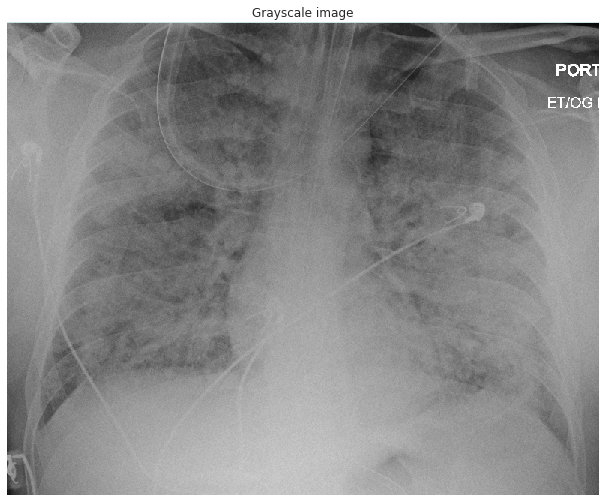

In [19]:
#Explore the gray scale image.

fig, ax = plt.subplots(figsize=(9, 16))
imshow(image, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');

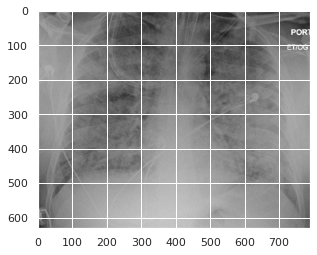

In [20]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.show()

In [21]:
image.shape #(631, 790, 3)

(631, 790, 3)

The output of image.shape is (631,790,3). In other words, the shape of the image is 631 x 790 x 3.

The first and the second number represents the height and width, respectively. The last number represents the number of color channels. 
We have 631 x 790 = 498,490 pixels in the data and every pixel has a RGB value (3 color channels). 

Determine the RGB values of the first pixel. 

As you can see from the output, the RGB values of the first pixel are 3, 3, and 3. 

In [22]:
image[0][0] #array([204, 227, 227], dtype=uint8)

array([204, 227, 227], dtype=uint8)

In [23]:
image2 = cv2.imread('/content/drive/My Drive/AI_Workshop/Color Code Images/breast cancer.png') 

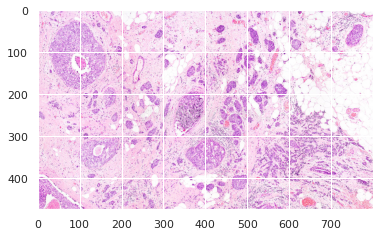

In [24]:
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

plt.show()

In [ ]:
image2.shape #(476, 800, 3)

(476, 800, 3)

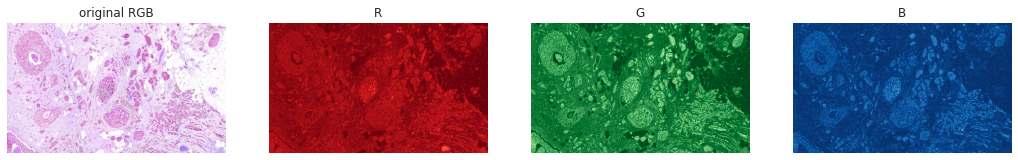

In [29]:
fig, ax = plt.subplots(1, 4, figsize = (18, 30))
ax[0].imshow(image2) 
ax[0].axis('off')
ax[0].set_title('original RGB')
for i, cmap in enumerate(['Reds','Greens','Blues']):
    ax[i+1].imshow(image2[:,:,i], cmap=cmap) 
    ax[i+1].axis('off')
    ax[i+1].set_title(cmap[0])
plt.show()

In [ ]:
image2[0][0] #array([203, 150, 217], dtype=uint8)

array([203, 150, 217], dtype=uint8)

## **Step 5:** Convert RGB 3 Channel Images into Gray Scale Images




In [25]:
grayImage = rgb2gray(image2)

In [26]:
#Define a function that will provide a summary of the image, exploring the RGB 3 channel image. 

def print_image_summary(image, labels):
    
    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')
    
    if len(labels) == 1:
        image = image[..., np.newaxis]
        
    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

In [27]:
print_image_summary(grayImage, ['G'])

--------------
Image Details:
--------------
Image dimensions: (476, 800)
Channels:
G : min=0.0490, max=1.0000


In [ ]:
print_image_summary(grayImage, ['R'])

--------------
Image Details:
--------------
Image dimensions: (476, 800)
Channels:
R : min=0.0490, max=1.0000


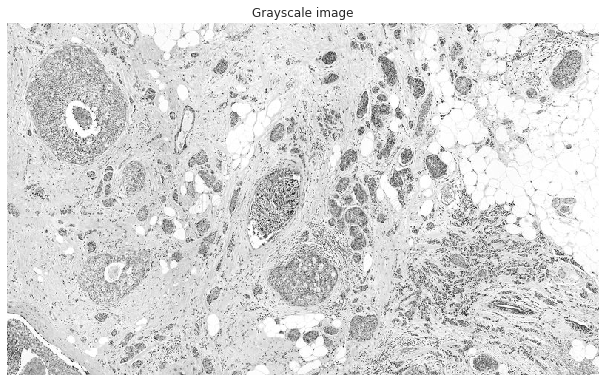

In [28]:
#Explore the gray scale image.

fig, ax = plt.subplots(figsize=(9, 16))
imshow(grayImage, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');